Unsupervised Machine Learning
K-Means is often used in: Social Network Analysis, Market Segmentation, Search Result Grouping,Medical Imaging, Anomaly Detection

#### What is not one of the common statistical measures used in choosing the appropriate value of "k"?

1. the Calinski Harabasz score
2. the elbow method
3. the Euclidean distance
    >  A standard approach to choosing a value for “k” is with the use of one or more statistical approaches or measures such as the elbow method, the average silhouette method, and the Calinski Harabasz score.
4. the average silhouette method

#### What is not a strength of k-Means clustering?

1. k-Means clustering can be scaled to large data sets.
1. k-Means clustering is useful for creating non-spherical clusters.
>k-Means clustering is not useful for creating non-spherical clusters. This means that it is not well suited for creating clusters with complex shapes and different sizes.
1. k-Means clustering is a very flexible and malleable algorithm.
1. k-Means clustering is based on simple statistical principles

#### Prior knowledge of the expected number of clusters is a valid approach to choosing "k".
1. FALSE
1. TRUE
>There are several common approaches to deal with the challenge of choosing the right “k”. One approach is to use a-priori or domain knowledge. With this approach, you use your prior knowledge of the expected number of clusters to inform our choice of k. This could be based on existing business requirements or other known constraints.

#### At some point during the expectation-maximization process, cluster centers no longer shift and items are no longer reassigned. This state is known as _____.

1. convergence
>Convergence is a point when cluster centroids no longer shift. This also means no item reassignments can occur after this point.
1. maximization
1. equilibrium
1. expectation

#### What type of clustering approach does k-Means clustering use?
1. partitional
>k-Means clustering is a partitional clustering approach. This means that the cluster boundaries are independent of each other; each item can only belong to one cluster, and every item is assigned to a cluster.
1. overlapping
1. hierarchical
1. density-based

#### k-Means clustering uses an expectation-maximization algorithm to assign items to a cluster. The maximization phase of the process involves computing new cluster centers.
1. TRUE
>Correct
1. FALSE

#### What is not a weakness of k-Means clustering?

1. k-Means clustering can be impacted by outliers.
1. k-Means has trouble working with data with regions of varying density.
1. k-Means clustering only works with numeric data.
1. k-Means clustering only works on small datasets.
    >k-Means clustering can be scaled to large data sets.

#### One objective of clustering is to ensure that the items within a particular cluster are as similar as possible. This is also known as high _____ similarity.

1. intra-class
> Correct
1. inter-class
1. between-cluster
1. between-class

#### In which type of clustering are cluster boundaries nested within other clusters?

1. hierarchical
> With hierarchical clustering, clusters are nested within other clusters. This means that the boundaries of a particular cluster can fall within the boundaries of another cluster, creating a parent-child relationship.
1. overlapping
1. partitional
1. density-based

In [1]:
# we want to use k-means to segment customers based on their income and assigned spending score.
import pandas as pd
customers = pd.read_csv(r"C:\Users\ahmadhas\Downloads\Ex_Files_ML_with_Python_k_Means_Clustering\Ex_Files_ML_with_Python_k_Means_Clustering\Exercise Files\02\mallcustomers.csv")

In [2]:
customers.head()

,CustomerID,Gender,Age,Income,SpendingScore
0,1,Male,19,15000,39
1,2,Male,21,15000,81
2,3,Female,20,16000,6
3,4,Female,23,16000,77
4,5,Female,31,17000,40


In [3]:
# to get summary

customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   Income         200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
# By default, the describe method returns summary statistics of numerical columns. we use include all to return categorical columns as well
customers.describe(include = 'all').round(2)


,CustomerID,Gender,Age,Income,SpendingScore
count,200.00,200,200.00,200.00,200.00
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.50,NaN,38.85,60560.00,50.20
std,57.88,NaN,13.97,26264.72,25.82
min,1.00,NaN,18.00,15000.00,1.00
25%,50.75,NaN,28.75,41500.00,34.75
50%,100.50,NaN,36.00,61500.00,50.00
75%,150.25,NaN,49.00,78000.00,73.00


In [5]:
customers.describe().round(2)

,CustomerID,Age,Income,SpendingScore
count,200.00,200.00,200.00,200.00
mean,100.50,38.85,60560.00,50.20
std,57.88,13.97,26264.72,25.82
min,1.00,18.00,15000.00,1.00
25%,50.75,28.75,41500.00,34.75
50%,100.50,36.00,61500.00,50.00
75%,150.25,49.00,78000.00,73.00
max,200.00,70.00,137000.00,99.00


In [6]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

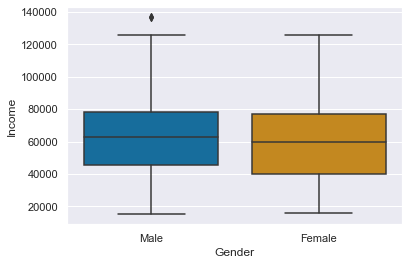

In [7]:
ax = sns.boxplot(data = customers, 
                 x = 'Gender', 
                 y = 'Income', 
                 palette = 'colorblind')

# as we can see, there is no significat difference ib income between male and female

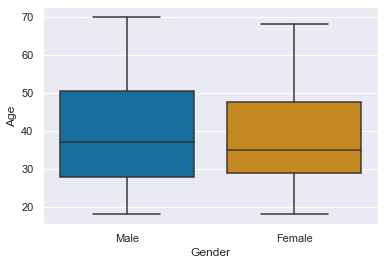

In [8]:
ax = sns.boxplot(data = customers, 
                 x = 'Gender', 
                 y = 'Age', 
                 palette = 'colorblind')

# also there is no significat difference ib age between male and female

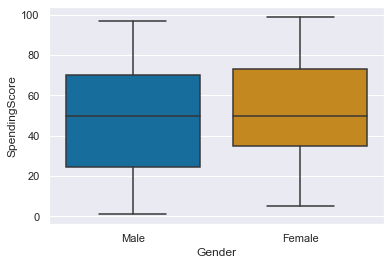

In [10]:
ax = sns.boxplot(data = customers, 
                 x = 'Gender', 
                 y = 'SpendingScore', 
                 palette = 'colorblind')

# # also there is no significat difference ib spending score between male and female

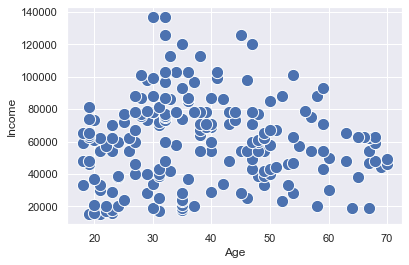

In [11]:
ax = sns.scatterplot(data = customers, 
                     x = 'Age', 
                     y = 'Income',
                     s = 150)

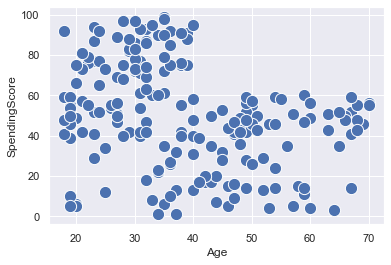

In [12]:
ax = sns.scatterplot(data = customers, 
                     x = 'Age', 
                     y = 'SpendingScore',
                     s = 150)
 

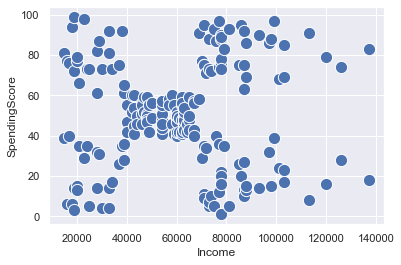

In [13]:
ax = sns.scatterplot(data = customers, 
                     x = 'Income', 
                     y = 'SpendingScore',
                     s = 150)

# we get sense of possible clusters

In [14]:
customers[['Income', 'SpendingScore']].describe().round(2)

,Income,SpendingScore
count,200.00,200.00
mean,60560.00,50.20
std,26264.72,25.82
min,15000.00,1.00
25%,41500.00,34.75
50%,61500.00,50.00
75%,78000.00,73.00
max,137000.00,99.00


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [16]:
customers_scaled = scaler.fit_transform(customers[['Income', 'SpendingScore']])

In [17]:
customers_scaled = pd.DataFrame(customers_scaled, columns = ['Income', 'SpendingScore'])

In [19]:
customers_scaled.describe().round(2)

# we use z-score standarization

,Income,SpendingScore
count,200.00,200.00
mean,-0.00,-0.00
std,1.00,1.00
min,-1.74,-1.91
25%,-0.73,-0.60
50%,0.04,-0.01
75%,0.67,0.89
max,2.92,1.89


In [21]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, n_init = 25, random_state = 1234)



In [22]:
km.fit(customers_scaled)
 

KMeans(n_clusters=3, n_init=25, random_state=1234)

In [23]:
 
km.labels_
 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [24]:
 
km.inertia_

157.70400815035939